In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the training and test data, which can be downloaded from the follwoing link.
https://www.kaggle.com/c/titanic/data

In [218]:
train_df = pd.read_csv('C:/Users/g.singh.choudhary/Desktop/Python/Kaggle Workplace/Titanic Problem/train.csv')
test_df = pd.read_csv('C:/Users/g.singh.choudhary/Desktop/Python/Kaggle Workplace/Titanic Problem/test.csv')

In [219]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here we can see that PClass, Age, SibSp, Parch and Fare are numerical features, and can be feeded to ML models after filling missing values.
But Other categorial features have to be transformed into numerical values. So here I'm joining training and test dataset, to obtain the same number of features during categorical conversion (feature engineering).

In [220]:
test_ids = test_df['PassengerId']
train_len = train_df.shape[0]
dataset = pd.concat([train_df, test_df], axis = 0).reset_index(drop = True)

In [221]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Lets fill empty and NaNs values with NaN and check for Null values

In [222]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Age and Cabin features have a major part of missing values.Survived missing values correspond to the join testing dataset (Survived column doesn't exist in test set and has been replace by NaN values when concatenating the train and test set)

##### summarize the training data statistically

In [223]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature Analysis

Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived Class

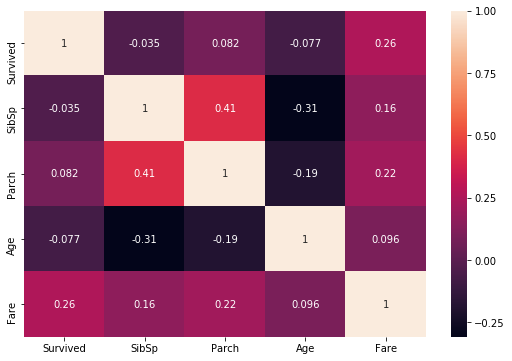

In [224]:
plt.figure(figsize = (9, 6))
sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot = True)
plt.show()

It is very clear that the feature Fare has a significant correlation with the survival probability. But subpopulations in other features can also be correlated with the survival probability. Let's explore these fatures one after one.

#### SibSp

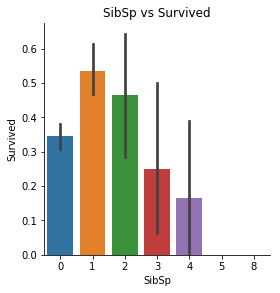

In [225]:
sns.factorplot(x = 'SibSp', y = 'Survived', data=train_df, kind = 'bar')
plt.title('SibSp vs Survived')
plt.show()

Here we can conclude that passengers who were having a lot of siblings/spouses had less chances of survival, whereas, passengers having upto two other persons had better chances.

#### Parch

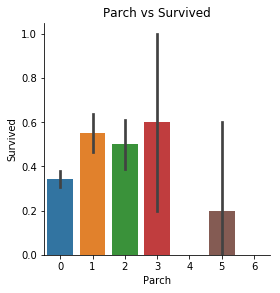

In [226]:
sns.factorplot(x = 'Parch', y = 'Survived', data=train_df, kind = 'bar')
plt.title('Parch vs Survived')
plt.show()

Small families had more chances to survive than singles (0) and big families(4,5,6)

#### Age

Explore Survived vs Age

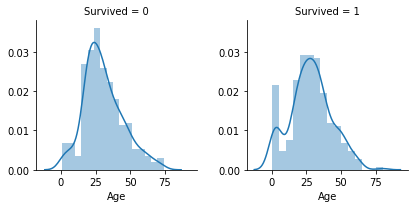

In [227]:
p = sns.FacetGrid(train_df, col='Survived')
p = p.map(sns.distplot, "Age")
plt.show()

It seems that Age distribution follows a gaussian distribution. If we analyze, it can be seen that people around 60-70 are more in non-survival class than survival and also there is peak corresponding to very young passengers, that have survived. we can see that there is age categories of passengers that of have more or less chance to survive.

#### Fare

To plot the univariate distribution of Fare, if we use distplot it gives an error bacause we have NAN value for Fare feature
So it's better to replace it with median value.

In [228]:
dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

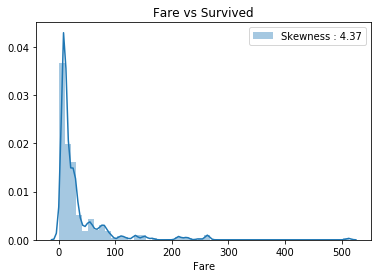

In [229]:
p = sns.distplot(dataset["Fare"] , label="Skewness : %.2f"%(dataset["Fare"].skew()))
p = p.legend(loc="best")
plt.title('Fare vs Survived')
plt.show()

The Fare data is highly skewed, so it's better to transform with log function to redure it's skewness.

In [230]:
dataset['Fare'] = dataset['Fare'].apply(lambda x : np.log(x) if x>0 else 0) 

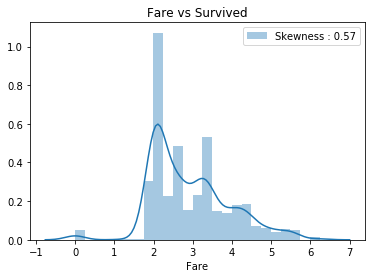

In [231]:
p = sns.distplot(dataset["Fare"] , label="Skewness : %.2f"%(dataset["Fare"].skew()))
p = p.legend(loc="best")
plt.title('Fare vs Survived')
plt.show()

Now it's much better.

### Categorial Values

#### Sex

Sex vs Survived

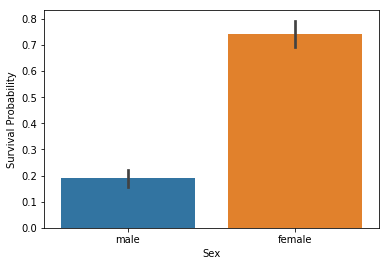

In [232]:
p = sns.barplot(x = "Sex", y = "Survived", data = train_df)
p.set_ylabel("Survival Probability")
plt.show()

It's very clear that Females have much better probability (>70%) of survival than males(<20%). So this feature would play an important role in predictions

#### PClass

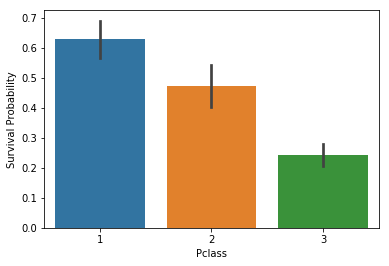

In [233]:
p = sns.barplot(x = "Pclass", y = "Survived", data = train_df)
p.set_ylabel("Survival Probability")
plt.show()

First class passengers > Second Class > Third Class Survival Probability

Let's give a try plotting class and sex together for survival probability.

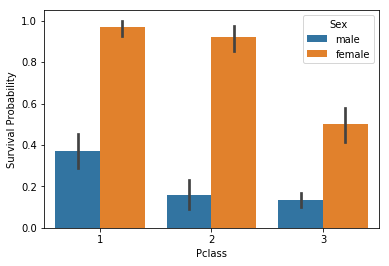

In [234]:
p = sns.barplot(x = "Pclass", y = "Survived", hue = 'Sex', data = train_df)
p.set_ylabel("Survival Probability")
plt.show()

No kiddings plz. First and Second class females are having >90% probability of surviving.

### Embarked

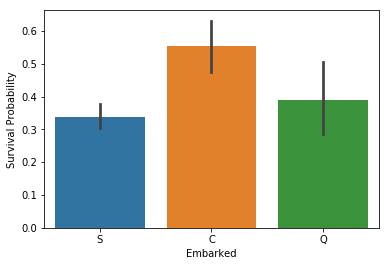

In [235]:
p = sns.barplot(x = "Embarked", y = "Survived", data = train_df)
p.set_ylabel("Survival Probability")
plt.show()

It seems that passenger coming from Cherbourg (C) have more chances to survive than Q and than S.

### Filling Missing Values

In [236]:
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Initially we had one Fare value as missing, which we filled during distribution plot. So now lets impute the Embarked values also with most frequent value.

In [237]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

#### Age

As we saw Age feature is having 263 missing values. For imputing missing values, lets explore Age vs Sex, Parch, Pclass, Sibsp correlations

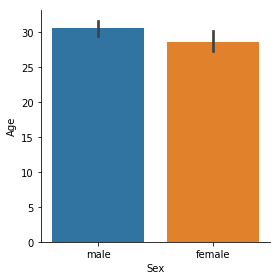

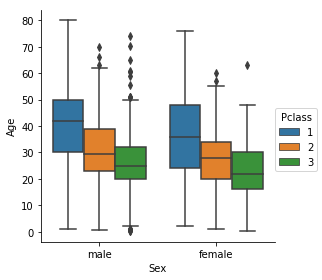

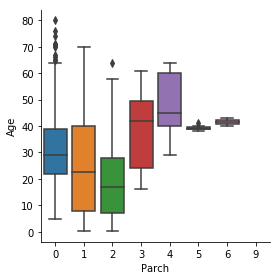

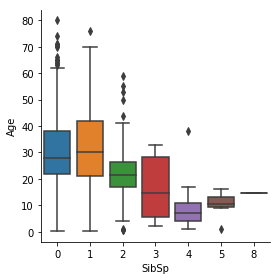

In [238]:
p = sns.factorplot(y = "Age", x = "Sex", data = dataset, kind = "bar")
p = sns.factorplot(y = "Age", x = "Sex", hue = "Pclass", data = dataset, kind = "box")
p = sns.factorplot(y = "Age", x = "Parch", data = dataset, kind = "box")
p = sns.factorplot(y = "Age", x = "SibSp", data = dataset, kind = "box")
plt.show()

Age distribution seems to be the same in Male and Female subpopulations, so Sex is not informative to predict Age.
However, 1rst class passengers are older than 2nd class passengers who are also older than 3rd class passengers.
Moreover, the more a passenger has parents/children the older he is and the more a passenger has siblings/spouses the younger he is.

So let's plot the correlation matrix of Age with Pclass, Parch, Sibsp to see their influence on Age

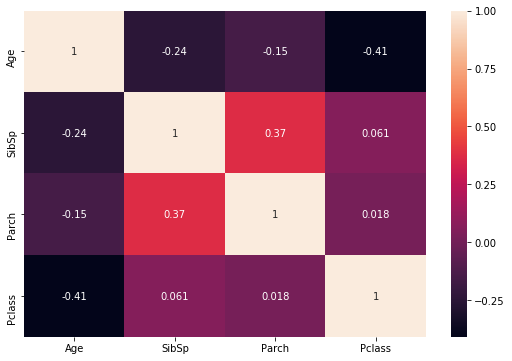

In [239]:
plt.figure(figsize = (9,6))
sns.heatmap(dataset[["Age", "SibSp", "Parch", "Pclass"]].corr(), annot=True)
plt.show()

Pclass has the best influence on Age, followed by Sibsp and then Parch. All of them are negatively correlated

In [240]:
missing_age_index = dataset["Age"][dataset["Age"].isnull()].index.tolist()

For filling the missing age values, lets compute the median value for all three attributes (SibSp, Parch, Pclass) and calculate the predicted age multiplying by it's weight factor.

Weight factor for Pclass = 0.41/(0.41+0.24+0.15) = 0.5125

Weight factor for Parch = 0.15/(0.41+0.24+0.15) = 0.1875

Weight factor for SibSp = 0.24/(0.41+0.24+0.15) = 0.3

In [241]:
for index in missing_age_index:
    median_pclass = np.nanmedian(dataset[dataset['Pclass'] == dataset.iloc[index]['Pclass']]['Age'])
    median_sibsp = np.nanmedian(dataset[dataset['SibSp'] == dataset.iloc[index]['SibSp']]['Age'])
    median_parch = np.nanmedian(dataset[dataset['Parch'] == dataset.iloc[index]['Parch']]['Age'])
    predicted_age = 0.5125*median_pclass + 0.3*median_sibsp + 0.1875*median_parch
    if not np.isnan(predicted_age):
        dataset['Age'].iloc[index] = predicted_age
    else:
        dataset['Age'].iloc[index] = np.nanmedian(dataset['Age'])

C:\Users\g.singh.choudhary\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\g.singh.choudhary\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


In [242]:
dataset['Age'].isnull().sum()

0

#### Name

Passenger's titles can be extracted from names

In [243]:
dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [244]:
def change_name(name):
    if name == 'Mrs':
        return 'Mrs'
    elif name == 'Mr':
        return 'Mr'
    elif name == 'Dr':
        return 'Dr'
    elif name == 'Miss' or name == 'Ms':
        return 'Miss'
    else:
        return 'Other'

In [245]:
dataset['Name'] = dataset['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip()).apply(change_name)

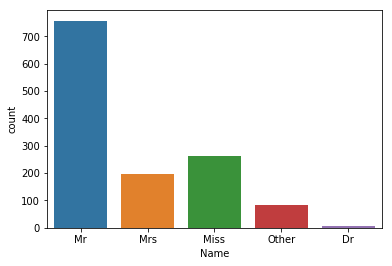

In [246]:
sns.countplot(x = 'Name' , data = dataset)
plt.show()

#### Cabin and Tickets

In [247]:
dataset['Cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [248]:
dataset['Cabin'].isnull().sum()

1014

1014 values are missing and only 295 values are available. It's good to drop this feature  because of almost all values are missing

Ticket No. is not useful to predict survival probability. So we'll drop these two columns completely

#### Prepare feedable data to models

In [249]:
dataset.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1, inplace=True)

In [250]:
y = dataset['Survived'][:train_len].values

In [251]:
dataset.drop('Survived', axis = 1, inplace = True)

In [253]:
dataset.isnull().sum()

Age         0
Embarked    0
Fare        0
Name        0
Parch       0
Pclass      0
Sex         0
SibSp       0
dtype: int64

In [254]:
dataset.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp
0,22.0,S,1.981001,Mr,0,3,male,1
1,38.0,C,4.266662,Mrs,0,1,female,1
2,26.0,S,2.070022,Miss,0,3,female,0
3,35.0,S,3.972177,Mrs,0,1,female,1
4,35.0,S,2.085672,Mr,0,3,male,0


In [257]:
X = pd.get_dummies(dataset, columns = ['Embarked', 'Name', 'Sex']).values

In [258]:
X.shape

(1309, 15)

In [260]:
X_test = X[train_len:]
X = X[:train_len]

In [261]:
X.shape, X_test.shape

((891, 15), (418, 15))

## Modeling with sklearn

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [264]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 15), (179, 15), (712,), (179,))

In [275]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_val_std = sc.transform(X_val)

I am using here 11 most frequently used models and evaluating mean accuracy of every cross validation set using stratified k fold method.
1. Logistic Regression
2. Decision Tree Classifier
3. Support Vector Classifier
4. K Nearest Neighbors Classifier
5. Gradient Boosting Classifier
6. Random Forest Classifier
7. AdaBoost Classifier
8. Naive Bayes Classifier
9. Extra Tree Classifier
10. Multi Layer Perceptron

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [277]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('Forest', RandomForestClassifier()))
models.append(('GBoost', GradientBoostingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('MLP', MLPClassifier()))

In [279]:
names = []
scores = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10,random_state = 0)
    val_score = cross_val_score(model, X_train_std, y_train, cv = kfold, scoring='accuracy')
    scores.append(val_score)
    names.append(name)
    print('%s : %f (%f)' %(name, val_score.mean(), val_score.std()))

LR : 0.823136 (0.034012)
Tree : 0.766952 (0.043560)
KNN : 0.806274 (0.041272)
SVC : 0.831548 (0.040913)
GNB : 0.762670 (0.122196)
Forest : 0.787904 (0.036781)
GBoost : 0.832976 (0.034164)
AdaBoost : 0.809110 (0.041123)
ExtraTrees : 0.772567 (0.038518)
MLP : 0.823077 (0.033778)


In [280]:
svc = SVC()
sc = StandardScaler()
X_train_std = sc.fit_transform( X)
X_test_std = sc.transform(X_test)
svc.fit(X_train_std , y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [285]:
y_test = svc.predict(X_test_std)

In [286]:
output=pd.DataFrame({'PassengerId':test_ids,'Survived':y_test})
output.to_csv('1.csv', index = False)

In [287]:
y_test.sum()

149.0